In [1]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem

In [2]:
df = pd.read_csv('tox21.csv')
df

,NR-AR,NR-AR-LBD,NR-AhR,NR-Aromatase,NR-ER,NR-ER-LBD,NR-PPAR-gamma,SR-ARE,SR-ATAD5,SR-HSE,SR-MMP,SR-p53,mol_id,smiles
0,0.0,0.0,1.0,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,TOX3021,CCOc1ccc2nc(S(N)(=O)=O)sc2c1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,TOX3020,CCN1C(=O)NC(c2ccccc2)C1=O
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,TOX3024,CC[C@]1(O)CC[C@H]2[C@@H]3CCC4=CCCC[C@@H]4[C@H]...
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,TOX3027,CCCN(CC)C(CC)C(=O)Nc1c(C)cccc1C
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TOX20800,CC(O)(P(=O)(O)O)P(=O)(O)O
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7826,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,TOX2725,CCOc1nc2cccc(C(=O)O)c2n1Cc1ccc(-c2ccccc2-c2nnn...
7827,1.0,1.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,TOX2370,CC(=O)[C@H]1CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(...
7828,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,TOX2371,C[C@]12CC[C@H]3[C@@H](CCC4=CC(=O)CC[C@@]43C)[C...
7829,1.0,1.0,0.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,TOX2377,C[C@]12CC[C@@H]3c4ccc(O)cc4CC[C@H]3[C@@H]1CC[C...


In [3]:
df.isnull().sum()

NR-AR             566
NR-AR-LBD        1073
NR-AhR           1282
NR-Aromatase     2010
NR-ER            1638
NR-ER-LBD         876
NR-PPAR-gamma    1381
SR-ARE           1999
SR-ATAD5          759
SR-HSE           1364
SR-MMP           2021
SR-p53           1057
mol_id              0
smiles              0
dtype: int64

In [4]:
df['mol'] = df['smiles'].apply(Chem.MolFromSmiles)
df.head()

[20:32:37] WARNING: not removing hydrogen atom without neighbors
[20:32:37] Explicit valence for atom # 8 Al, 6, is greater than permitted
[20:32:37] Explicit valence for atom # 3 Al, 6, is greater than permitted
[20:32:37] Explicit valence for atom # 4 Al, 6, is greater than permitted
[20:32:37] Explicit valence for atom # 4 Al, 6, is greater than permitted
[20:32:37] Explicit valence for atom # 9 Al, 6, is greater than permitted
[20:32:37] Explicit valence for atom # 5 Al, 6, is greater than permitted
[20:32:37] Explicit valence for atom # 16 Al, 6, is greater than permitted
[20:32:38] Explicit valence for atom # 20 Al, 6, is greater than permitted


,NR-AR,NR-AR-LBD,NR-AhR,NR-Aromatase,NR-ER,NR-ER-LBD,NR-PPAR-gamma,SR-ARE,SR-ATAD5,SR-HSE,SR-MMP,SR-p53,mol_id,smiles,mol
0,0.0,0.0,1.0,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,TOX3021,CCOc1ccc2nc(S(N)(=O)=O)sc2c1,<rdkit.Chem.rdchem.Mol object at 0x7f814d7d1cb0>
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,TOX3020,CCN1C(=O)NC(c2ccccc2)C1=O,<rdkit.Chem.rdchem.Mol object at 0x7f814d7d2260>
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,TOX3024,CC[C@]1(O)CC[C@H]2[C@@H]3CCC4=CCCC[C@@H]4[C@H]...,<rdkit.Chem.rdchem.Mol object at 0x7f814d7d22d0>
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,TOX3027,CCCN(CC)C(CC)C(=O)Nc1c(C)cccc1C,<rdkit.Chem.rdchem.Mol object at 0x7f814d7d2340>
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TOX20800,CC(O)(P(=O)(O)O)P(=O)(O)O,<rdkit.Chem.rdchem.Mol object at 0x7f814d7d2570>


In [5]:
pip install sweetviz          # for fast exploratory data analysis (eda)

Note: you may need to restart the kernel to use updated packages.


In [6]:
import sweetviz as sv 

In [7]:
df_nomol = df.drop(columns = ['mol'])
df_nomol.head()

,NR-AR,NR-AR-LBD,NR-AhR,NR-Aromatase,NR-ER,NR-ER-LBD,NR-PPAR-gamma,SR-ARE,SR-ATAD5,SR-HSE,SR-MMP,SR-p53,mol_id,smiles
0,0.0,0.0,1.0,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,TOX3021,CCOc1ccc2nc(S(N)(=O)=O)sc2c1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,TOX3020,CCN1C(=O)NC(c2ccccc2)C1=O
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,TOX3024,CC[C@]1(O)CC[C@H]2[C@@H]3CCC4=CCCC[C@@H]4[C@H]...
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,TOX3027,CCCN(CC)C(CC)C(=O)Nc1c(C)cccc1C
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TOX20800,CC(O)(P(=O)(O)O)P(=O)(O)O


                                             |          | [  0%]   00:00 -> (? left)


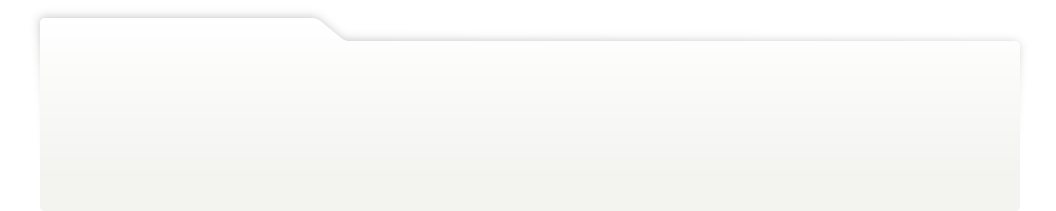
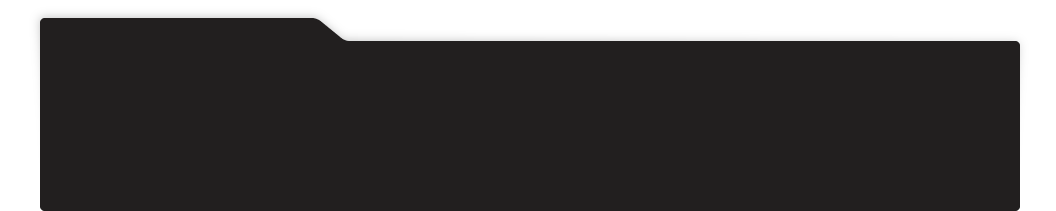
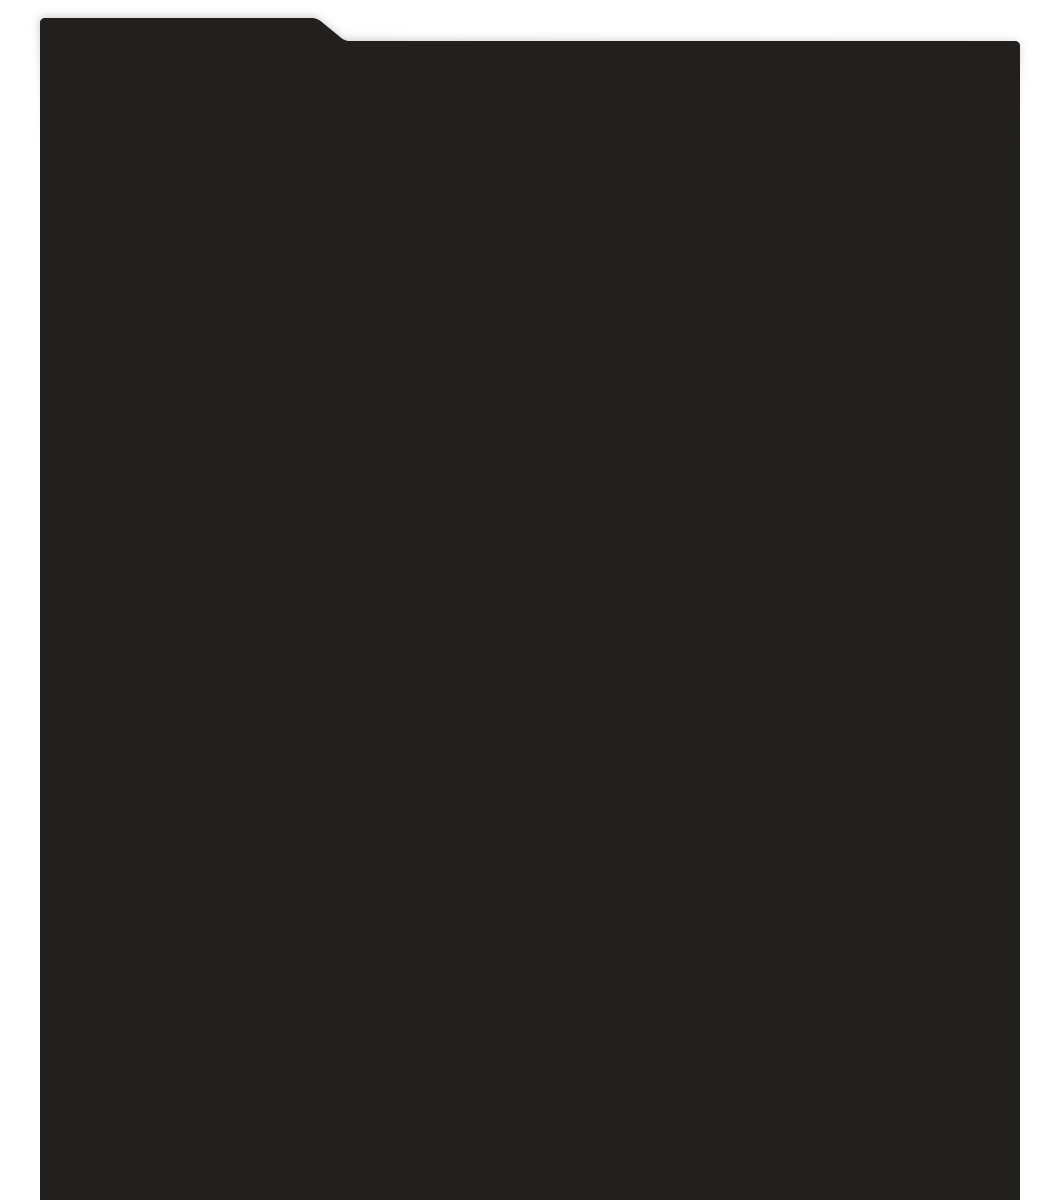
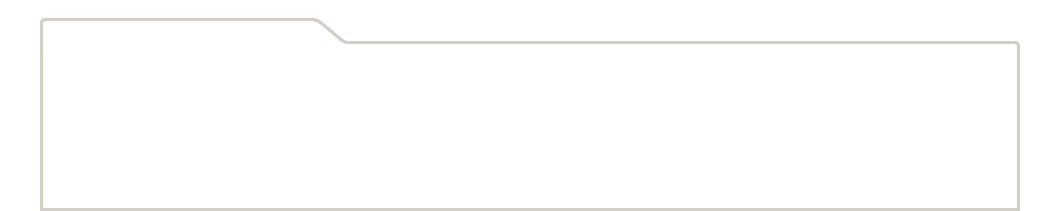
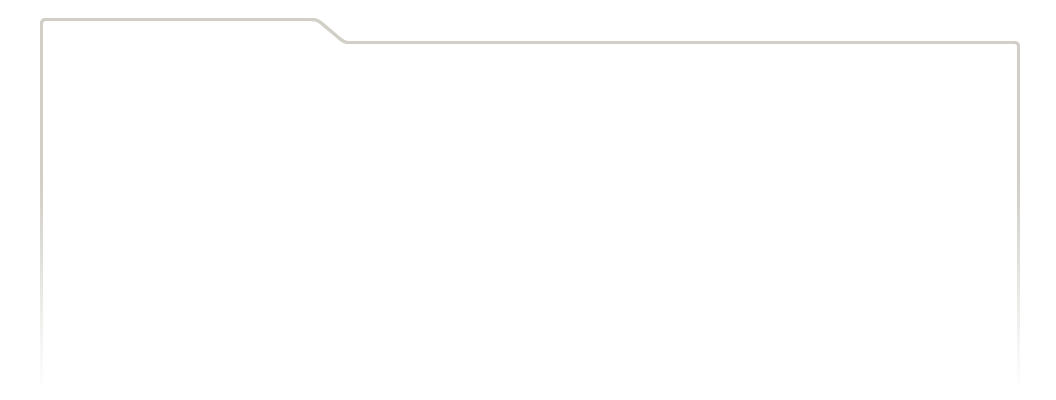
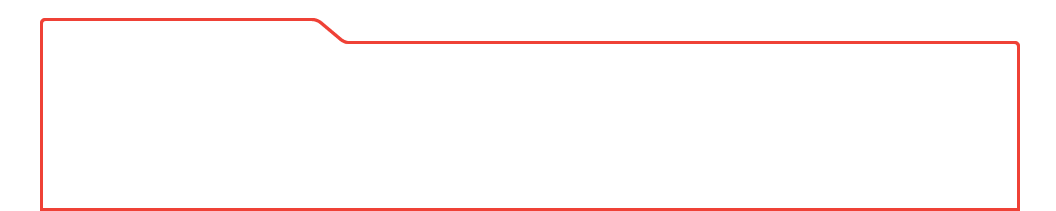
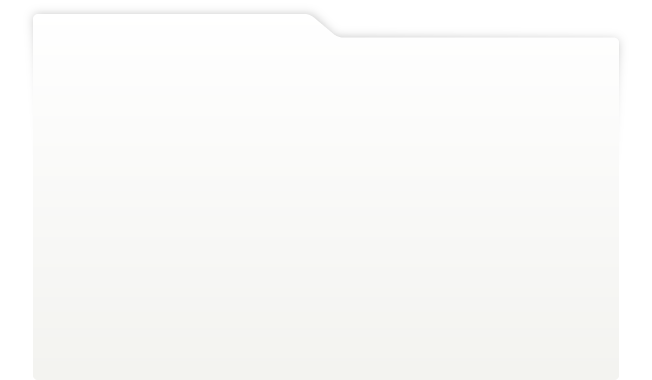
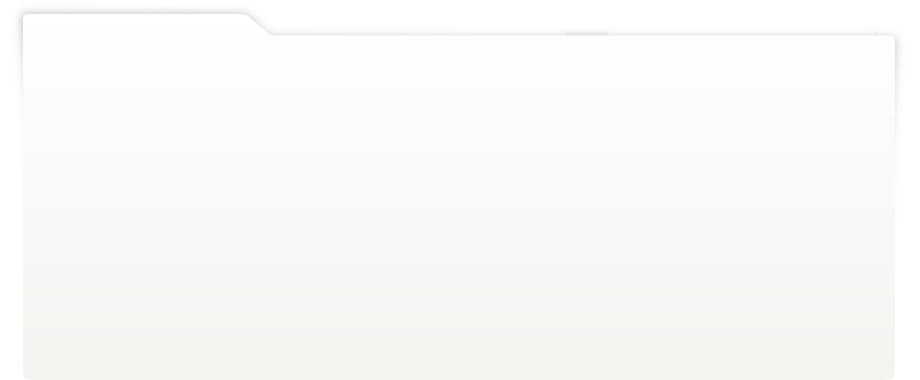
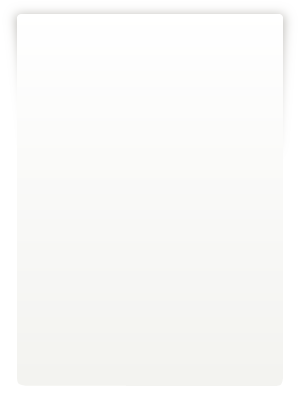
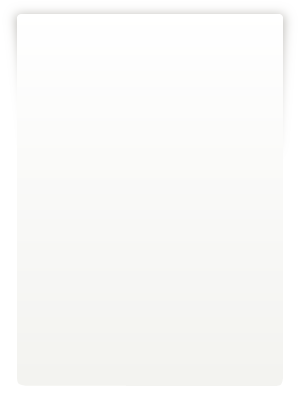
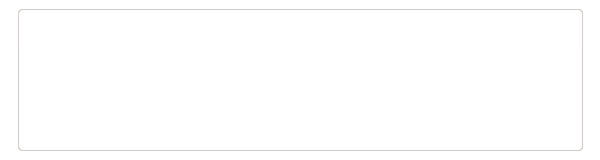
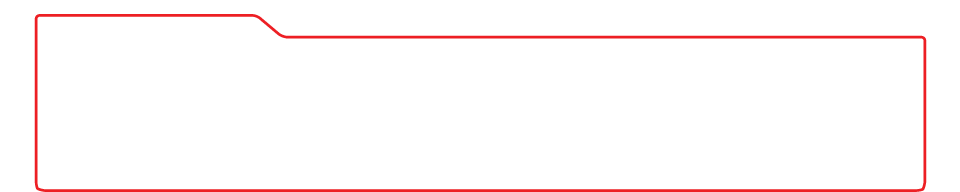
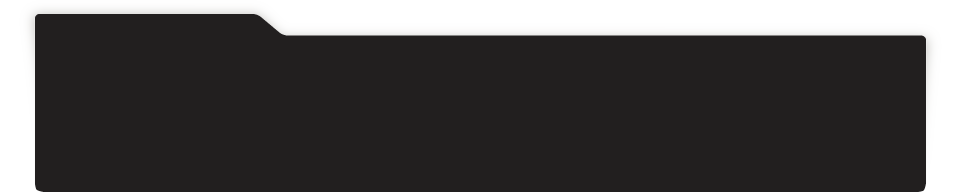
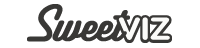
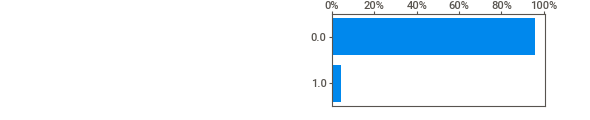
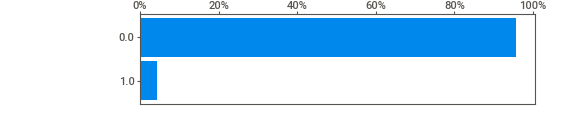
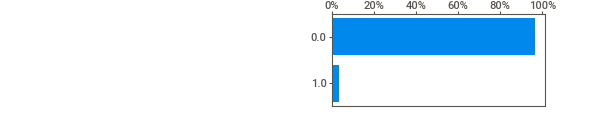
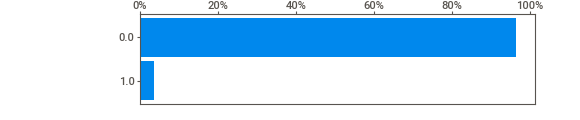
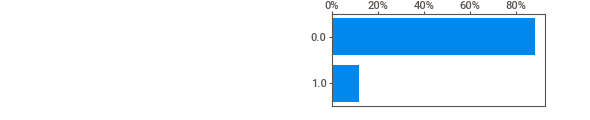
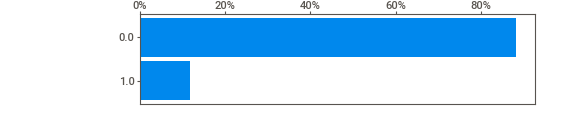
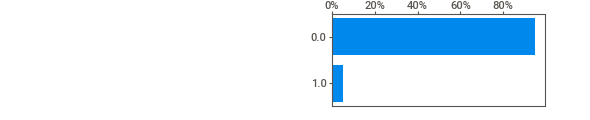
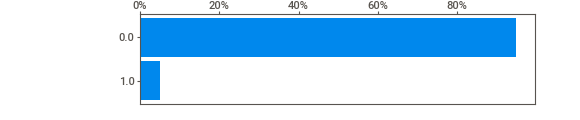
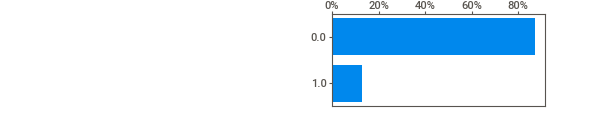
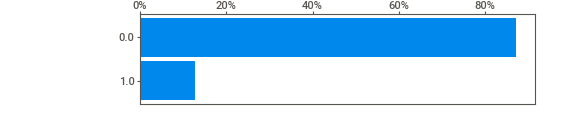
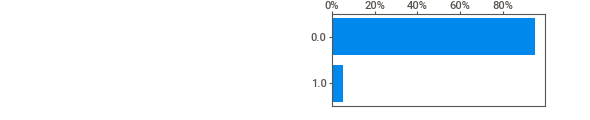
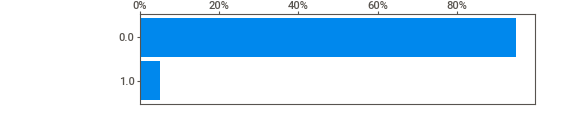
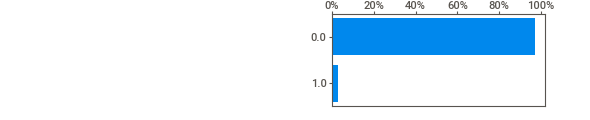
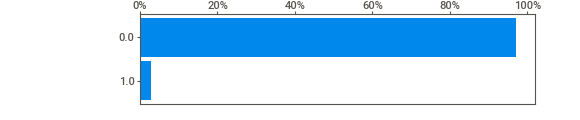
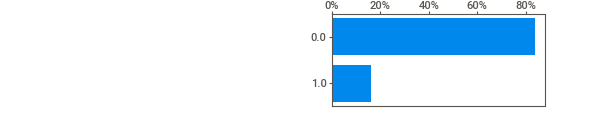
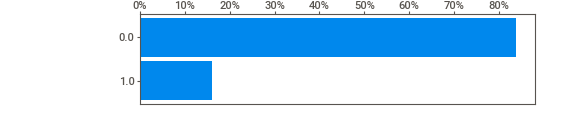
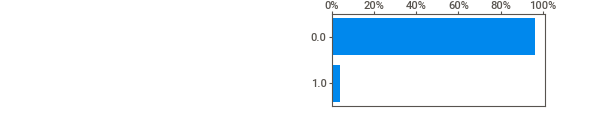
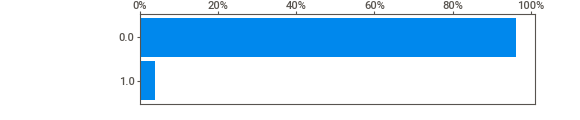
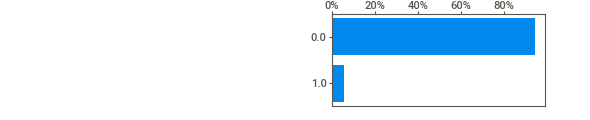
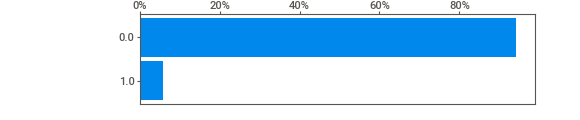
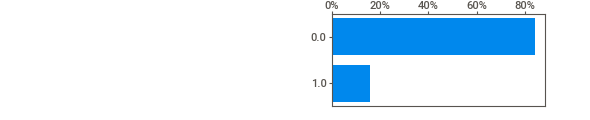
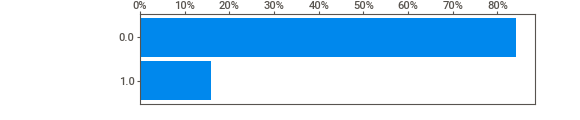
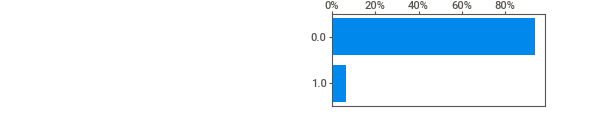
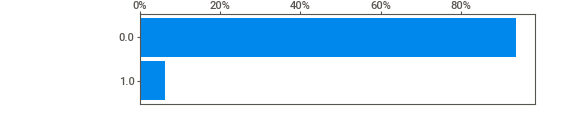
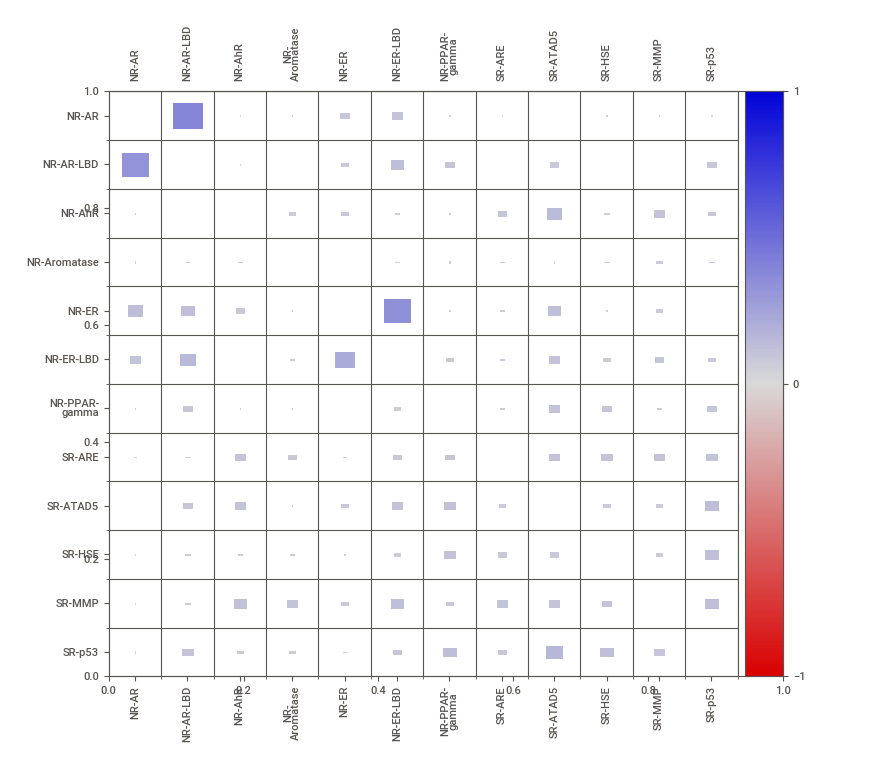
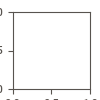

In [8]:
# Analyse Dataset
report = sv.analyze(df_nomol)

# View and Save
report.show_notebook()

In [9]:
df = df.dropna(subset=['mol']).copy()
df_data = df.drop(['mol', 'smiles', 'mol_id'], axis=1)

In [10]:
df_missing_value = ((df_data.isnull().sum()/df.count(numeric_only=True))*100).round(2)

In [11]:
display(df_missing_value)

NR-AR             7.78
NR-AR-LBD        15.88
NR-AhR           19.58
NR-Aromatase     34.53
NR-ER            26.46
NR-ER-LBD        12.59
NR-PPAR-gamma    21.42
SR-ARE           34.30
SR-ATAD5         10.73
SR-HSE           21.10
SR-MMP           34.79
SR-p53           15.61
dtype: float64

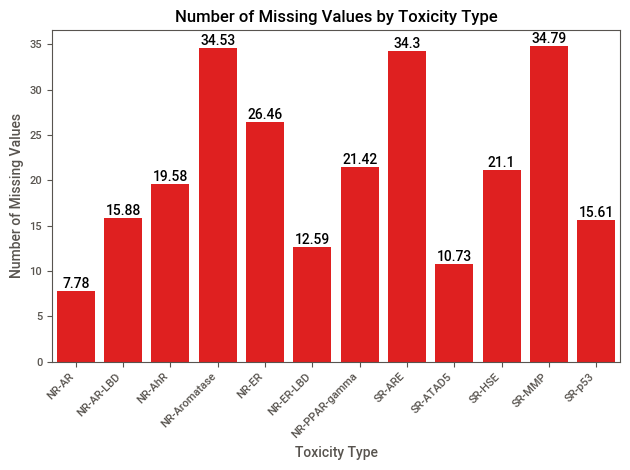

In [12]:
# making a bar plot to show the data
import seaborn as sns
import matplotlib.pyplot as plt

# Create the bar plot
ax = sns.barplot(data=df_missing_value, color='red')

# Customize
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.title('Number of Missing Values by Toxicity Type')
plt.xlabel('Toxicity Type')
plt.ylabel('Number of Missing Values')
plt.tight_layout()
for container in ax.containers:
    ax.bar_label(container)

plt.savefig('mising_value.png', dpi=300)

In [13]:
df_count_toxic = ((df.sum(numeric_only=True)/df.count(numeric_only=True))*100).round(2)

In [14]:
display(df_count_toxic)

NR-AR             4.24
NR-AR-LBD         3.51
NR-AhR           11.74
NR-Aromatase      5.16
NR-ER            12.79
NR-ER-LBD         5.02
NR-PPAR-gamma     2.89
SR-ARE           16.17
SR-ATAD5          3.74
SR-HSE            5.76
SR-MMP           15.82
SR-p53            6.25
dtype: float64

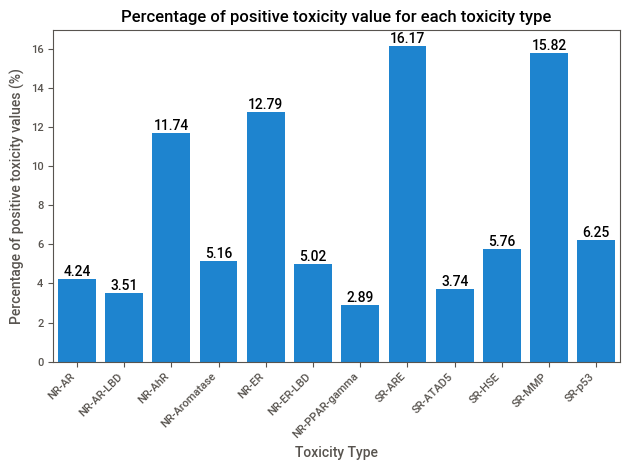

In [15]:
ax = sns.barplot(data=df_count_toxic)

# Customize
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.title('Percentage of positive toxicity value for each toxicity type')
plt.xlabel('Toxicity Type')
plt.ylabel('Percentage of positive toxicity values (%)')
plt.tight_layout()

for container in ax.containers:
    ax.bar_label(container)

plt.savefig('toxicity_percentage.png', dpi=300)

Try to balance the data for SR-ARE

In [16]:
df_SRARE_toxic1 = df[df["SR-ARE"] == 1]

In [17]:
display(df_SRARE_toxic1)

,NR-AR,NR-AR-LBD,NR-AhR,NR-Aromatase,NR-ER,NR-ER-LBD,NR-PPAR-gamma,SR-ARE,SR-ATAD5,SR-HSE,SR-MMP,SR-p53,mol_id,smiles,mol
0,0.0,0.0,1.0,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,TOX3021,CCOc1ccc2nc(S(N)(=O)=O)sc2c1,<rdkit.Chem.rdchem.Mol object at 0x7f814d7d1cb0>
7,0.0,NaN,0.0,NaN,1.0,NaN,NaN,1.0,0.0,1.0,0.0,1.0,TOX25232,O=C(O)Cc1cc(I)c(Oc2ccc(O)c(I)c2)c(I)c1,<rdkit.Chem.rdchem.Mol object at 0x7f814d7d1bd0>
14,0.0,0.0,0.0,NaN,0.0,0.0,NaN,1.0,0.0,0.0,0.0,NaN,TOX15748,Cl/C=C\C[N+]12CN3CN(CN(C3)C1)C2,<rdkit.Chem.rdchem.Mol object at 0x7f814d7d28f0>
22,0.0,0.0,1.0,NaN,1.0,0.0,NaN,1.0,1.0,0.0,NaN,0.0,TOX4460,Nc1ccc(/N=N/c2ccccc2)cc1,<rdkit.Chem.rdchem.Mol object at 0x7f814d7d2c70>
33,0.0,NaN,1.0,NaN,NaN,0.0,NaN,1.0,0.0,0.0,1.0,1.0,TOX1106,Oc1c(Cl)c(Cl)c(Cl)c(Cl)c1Cl,<rdkit.Chem.rdchem.Mol object at 0x7f814d7d3140>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7751,0.0,1.0,1.0,NaN,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,TOX294,CC(=O)Nc1ccc(C(=O)CCl)cc1,<rdkit.Chem.rdchem.Mol object at 0x7f814d8cbca0>
7756,0.0,NaN,0.0,NaN,NaN,0.0,NaN,1.0,0.0,1.0,NaN,1.0,TOX20269,CCC(C)c1cc([N+](=O)[O-])cc([N+](=O)[O-])c1OC(=...,<rdkit.Chem.rdchem.Mol object at 0x7f814d8cbed0>
7757,0.0,NaN,0.0,NaN,NaN,1.0,NaN,1.0,NaN,1.0,1.0,1.0,TOX20268,CCC(C)c1cc([N+](=O)[O-])cc([N+](=O)[O-])c1OC(=...,<rdkit.Chem.rdchem.Mol object at 0x7f814d8cbf40>
7812,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.0,0.0,NaN,1.0,NaN,TOX560,O=S1OCC2C(CO1)C1(Cl)C(Cl)=C(Cl)C2(Cl)C1(Cl)Cl,<rdkit.Chem.rdchem.Mol object at 0x7f814d8cd7e0>


In [18]:
df_SRARE_toxic0 = df[df["SR-ARE"] == 0]

In [19]:
df_equal_SRARE_toxic0 = df_SRARE_toxic0.sample(n=len(df_SRARE_toxic1), random_state=1)

In [20]:
display(df_equal_SRARE_toxic0)

,NR-AR,NR-AR-LBD,NR-AhR,NR-Aromatase,NR-ER,NR-ER-LBD,NR-PPAR-gamma,SR-ARE,SR-ATAD5,SR-HSE,SR-MMP,SR-p53,mol_id,smiles,mol
3029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TOX6064,Cc1cc(NS(=O)(=O)c2ccc(N)cc2)no1,<rdkit.Chem.rdchem.Mol object at 0x7f814d849af0>
2921,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,TOX27291,Nc1cc2c3c(c1)C(c1ccccc1)=N[C@@H](NC(=O)c1cccnc...,<rdkit.Chem.rdchem.Mol object at 0x7f814d846b20>
4940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,TOX26000,C[C@H]1[C@H]2CC[C@H]3[C@@H]4CC=C5C[C@@H](N(C)C...,<rdkit.Chem.rdchem.Mol object at 0x7f814d87e500>
1296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TOX3323,OCCN1C[C@H](O)[C@@H](O)[C@H](O)[C@H]1CO,<rdkit.Chem.rdchem.Mol object at 0x7f814d819f50>
5358,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TOX14618,CCOC(=O)COc1cc(-n2ncc(C(F)(F)F)c(C)c2=O)c(F)cc1Cl,<rdkit.Chem.rdchem.Mol object at 0x7f814d889d90>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,TOX29277,Brc1cc2ccccc2c2ccccc12,<rdkit.Chem.rdchem.Mol object at 0x7f814d7fc190>
5576,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TOX27940,CCn1cc[n+](C)c1.N#CN=C=[N-],<rdkit.Chem.rdchem.Mol object at 0x7f814d88fd10>
4967,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TOX5633,Cc1ccc(N)cc1[N+](=O)[O-],<rdkit.Chem.rdchem.Mol object at 0x7f814d87f0d0>
6713,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TOX923,Cc1cccc(C)c1NC(=O)CN1CCCC1=O,<rdkit.Chem.rdchem.Mol object at 0x7f814d8b3300>


In [21]:
frames = [df_equal_SRARE_toxic0, df_SRARE_toxic1]

result = pd.concat(frames)

In [22]:
display(result)

,NR-AR,NR-AR-LBD,NR-AhR,NR-Aromatase,NR-ER,NR-ER-LBD,NR-PPAR-gamma,SR-ARE,SR-ATAD5,SR-HSE,SR-MMP,SR-p53,mol_id,smiles,mol
3029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TOX6064,Cc1cc(NS(=O)(=O)c2ccc(N)cc2)no1,<rdkit.Chem.rdchem.Mol object at 0x7f814d849af0>
2921,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,TOX27291,Nc1cc2c3c(c1)C(c1ccccc1)=N[C@@H](NC(=O)c1cccnc...,<rdkit.Chem.rdchem.Mol object at 0x7f814d846b20>
4940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,TOX26000,C[C@H]1[C@H]2CC[C@H]3[C@@H]4CC=C5C[C@@H](N(C)C...,<rdkit.Chem.rdchem.Mol object at 0x7f814d87e500>
1296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TOX3323,OCCN1C[C@H](O)[C@@H](O)[C@H](O)[C@H]1CO,<rdkit.Chem.rdchem.Mol object at 0x7f814d819f50>
5358,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TOX14618,CCOC(=O)COc1cc(-n2ncc(C(F)(F)F)c(C)c2=O)c(F)cc1Cl,<rdkit.Chem.rdchem.Mol object at 0x7f814d889d90>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7751,0.0,1.0,1.0,NaN,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,TOX294,CC(=O)Nc1ccc(C(=O)CCl)cc1,<rdkit.Chem.rdchem.Mol object at 0x7f814d8cbca0>
7756,0.0,NaN,0.0,NaN,NaN,0.0,NaN,1.0,0.0,1.0,NaN,1.0,TOX20269,CCC(C)c1cc([N+](=O)[O-])cc([N+](=O)[O-])c1OC(=...,<rdkit.Chem.rdchem.Mol object at 0x7f814d8cbed0>
7757,0.0,NaN,0.0,NaN,NaN,1.0,NaN,1.0,NaN,1.0,1.0,1.0,TOX20268,CCC(C)c1cc([N+](=O)[O-])cc([N+](=O)[O-])c1OC(=...,<rdkit.Chem.rdchem.Mol object at 0x7f814d8cbf40>
7812,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.0,0.0,NaN,1.0,NaN,TOX560,O=S1OCC2C(CO1)C1(Cl)C(Cl)=C(Cl)C2(Cl)C1(Cl)Cl,<rdkit.Chem.rdchem.Mol object at 0x7f814d8cd7e0>


In [23]:
df = df.dropna(subset=['SR-ATAD5']).copy()

In [24]:
display(df)

,NR-AR,NR-AR-LBD,NR-AhR,NR-Aromatase,NR-ER,NR-ER-LBD,NR-PPAR-gamma,SR-ARE,SR-ATAD5,SR-HSE,SR-MMP,SR-p53,mol_id,smiles,mol
0,0.0,0.0,1.0,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,TOX3021,CCOc1ccc2nc(S(N)(=O)=O)sc2c1,<rdkit.Chem.rdchem.Mol object at 0x7f814d7d1cb0>
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,TOX3020,CCN1C(=O)NC(c2ccccc2)C1=O,<rdkit.Chem.rdchem.Mol object at 0x7f814d7d2260>
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,TOX3027,CCCN(CC)C(CC)C(=O)Nc1c(C)cccc1C,<rdkit.Chem.rdchem.Mol object at 0x7f814d7d2340>
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TOX20800,CC(O)(P(=O)(O)O)P(=O)(O)O,<rdkit.Chem.rdchem.Mol object at 0x7f814d7d2570>
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,TOX5110,CC(C)(C)OOC(C)(C)CCC(C)(C)OOC(C)(C)C,<rdkit.Chem.rdchem.Mol object at 0x7f814d7d1d20>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7825,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,0.0,TOX25184,CCCNCC(O)COc1ccccc1C(=O)CCc1ccccc1,<rdkit.Chem.rdchem.Mol object at 0x7f814d8cdd90>
7827,1.0,1.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,TOX2370,CC(=O)[C@H]1CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(...,<rdkit.Chem.rdchem.Mol object at 0x7f814d8cde70>
7828,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,TOX2371,C[C@]12CC[C@H]3[C@@H](CCC4=CC(=O)CC[C@@]43C)[C...,<rdkit.Chem.rdchem.Mol object at 0x7f814d8cdee0>
7829,1.0,1.0,0.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,TOX2377,C[C@]12CC[C@@H]3c4ccc(O)cc4CC[C@H]3[C@@H]1CC[C...,<rdkit.Chem.rdchem.Mol object at 0x7f814d8cdf50>


In [25]:
df['fingerprint'] = df['mol'].apply(AllChem.RDKFingerprint)
df['fingerprint_string'] = df['fingerprint'].apply(lambda x: x.ToBitString())
df

,NR-AR,NR-AR-LBD,NR-AhR,NR-Aromatase,NR-ER,NR-ER-LBD,NR-PPAR-gamma,SR-ARE,SR-ATAD5,SR-HSE,SR-MMP,SR-p53,mol_id,smiles,mol,fingerprint,fingerprint_string
0,0.0,0.0,1.0,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,TOX3021,CCOc1ccc2nc(S(N)(=O)=O)sc2c1,<rdkit.Chem.rdchem.Mol object at 0x7f814d7d1cb0>,"[1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",1011110000100000010101010100001101100010100010...
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,TOX3020,CCN1C(=O)NC(c2ccccc2)C1=O,<rdkit.Chem.rdchem.Mol object at 0x7f814d7d2260>,"[0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, ...",0000110010100010101000000000011010001000000110...
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,TOX3027,CCCN(CC)C(CC)C(=O)Nc1c(C)cccc1C,<rdkit.Chem.rdchem.Mol object at 0x7f814d7d2340>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, ...",0000000000010101110010110001000000010000001000...
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TOX20800,CC(O)(P(=O)(O)O)P(=O)(O)O,<rdkit.Chem.rdchem.Mol object at 0x7f814d7d2570>,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...",0010000000001000000000100000000000000100010000...
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,TOX5110,CC(C)(C)OOC(C)(C)CCC(C)(C)OOC(C)(C)C,<rdkit.Chem.rdchem.Mol object at 0x7f814d7d1d20>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",0000000000000010000000000000000000100010000000...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7825,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,0.0,TOX25184,CCCNCC(O)COc1ccccc1C(=O)CCc1ccccc1,<rdkit.Chem.rdchem.Mol object at 0x7f814d8cdd90>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0000000000000000000010000001000000000000000010...
7827,1.0,1.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,TOX2370,CC(=O)[C@H]1CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(...,<rdkit.Chem.rdchem.Mol object at 0x7f814d8cde70>,"[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, ...",0000001010000000000000001000010000010100010000...
7828,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,TOX2371,C[C@]12CC[C@H]3[C@@H](CCC4=CC(=O)CC[C@@]43C)[C...,<rdkit.Chem.rdchem.Mol object at 0x7f814d8cdee0>,"[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, ...",0000001010000000000000001000010000010100010000...
7829,1.0,1.0,0.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,TOX2377,C[C@]12CC[C@@H]3c4ccc(O)cc4CC[C@H]3[C@@H]1CC[C...,<rdkit.Chem.rdchem.Mol object at 0x7f814d8cdf50>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",0000000000100000000100001000010100110000010000...


In [26]:
df_X = pd.DataFrame()

columns_to_add = {}
for n in range(len(df['fingerprint_string'].iloc[0])):
    columns_to_add[f"{n}th"] = df['fingerprint_string'].apply(lambda x: int(x[n]))

new_cols_df = pd.DataFrame(columns_to_add)
df_X = pd.concat([df_X, new_cols_df], axis=1)

In [27]:
df_X.head()

,0th,1th,2th,3th,4th,5th,6th,7th,8th,9th,...,2038th,2039th,2040th,2041th,2042th,2043th,2044th,2045th,2046th,2047th
0,1,0,1,1,1,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
1,0,0,0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Preparing data for SR-ATAD5

In [28]:
from sklearn.preprocessing import StandardScaler            # for scaling the data
from sklearn.model_selection import train_test_split        # for splitting the data into training and testing sets
from sklearn.model_selection import cross_val_score, KFold  # for K-fold cross-validation
from sklearn.linear_model import LinearRegression           # for creating a linear regression model
from sklearn.ensemble import RandomForestClassifier          # for creating a random forest regression model
from sklearn.dummy import DummyRegressor                    # for creating a base regressor to compare the model with
from sklearn.metrics import mean_squared_error, r2_score    # for evaluating the model
from sklearn.pipeline import make_pipeline                  # for building operational pipelines

In [29]:
#df['FingerPrintArray'] = df['fingerprint'].apply(lambda x: np.array(x))

In [30]:
display(df)

,NR-AR,NR-AR-LBD,NR-AhR,NR-Aromatase,NR-ER,NR-ER-LBD,NR-PPAR-gamma,SR-ARE,SR-ATAD5,SR-HSE,SR-MMP,SR-p53,mol_id,smiles,mol,fingerprint,fingerprint_string
0,0.0,0.0,1.0,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,TOX3021,CCOc1ccc2nc(S(N)(=O)=O)sc2c1,<rdkit.Chem.rdchem.Mol object at 0x7f814d7d1cb0>,"[1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",1011110000100000010101010100001101100010100010...
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,TOX3020,CCN1C(=O)NC(c2ccccc2)C1=O,<rdkit.Chem.rdchem.Mol object at 0x7f814d7d2260>,"[0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, ...",0000110010100010101000000000011010001000000110...
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,TOX3027,CCCN(CC)C(CC)C(=O)Nc1c(C)cccc1C,<rdkit.Chem.rdchem.Mol object at 0x7f814d7d2340>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, ...",0000000000010101110010110001000000010000001000...
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TOX20800,CC(O)(P(=O)(O)O)P(=O)(O)O,<rdkit.Chem.rdchem.Mol object at 0x7f814d7d2570>,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...",0010000000001000000000100000000000000100010000...
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,TOX5110,CC(C)(C)OOC(C)(C)CCC(C)(C)OOC(C)(C)C,<rdkit.Chem.rdchem.Mol object at 0x7f814d7d1d20>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",0000000000000010000000000000000000100010000000...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7825,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,0.0,TOX25184,CCCNCC(O)COc1ccccc1C(=O)CCc1ccccc1,<rdkit.Chem.rdchem.Mol object at 0x7f814d8cdd90>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0000000000000000000010000001000000000000000010...
7827,1.0,1.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,TOX2370,CC(=O)[C@H]1CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(...,<rdkit.Chem.rdchem.Mol object at 0x7f814d8cde70>,"[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, ...",0000001010000000000000001000010000010100010000...
7828,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,TOX2371,C[C@]12CC[C@H]3[C@@H](CCC4=CC(=O)CC[C@@]43C)[C...,<rdkit.Chem.rdchem.Mol object at 0x7f814d8cdee0>,"[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, ...",0000001010000000000000001000010000010100010000...
7829,1.0,1.0,0.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,TOX2377,C[C@]12CC[C@@H]3c4ccc(O)cc4CC[C@H]3[C@@H]1CC[C...,<rdkit.Chem.rdchem.Mol object at 0x7f814d8cdf50>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",0000000000100000000100001000010100110000010000...


In [31]:
#df_SR_ATAD5 = df.loc[df['SR-ATAD5'].notna(), ['SR-ATAD5', 'FingerPrintArray']]

In [46]:
result.head()

,NR-AR,NR-AR-LBD,NR-AhR,NR-Aromatase,NR-ER,NR-ER-LBD,NR-PPAR-gamma,SR-ARE,SR-ATAD5,SR-HSE,SR-MMP,SR-p53,mol_id,smiles,mol
3029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TOX6064,Cc1cc(NS(=O)(=O)c2ccc(N)cc2)no1,<rdkit.Chem.rdchem.Mol object at 0x7f814d849af0>
2921,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,TOX27291,Nc1cc2c3c(c1)C(c1ccccc1)=N[C@@H](NC(=O)c1cccnc...,<rdkit.Chem.rdchem.Mol object at 0x7f814d846b20>
4940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,TOX26000,C[C@H]1[C@H]2CC[C@H]3[C@@H]4CC=C5C[C@@H](N(C)C...,<rdkit.Chem.rdchem.Mol object at 0x7f814d87e500>
1296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TOX3323,OCCN1C[C@H](O)[C@@H](O)[C@H](O)[C@H]1CO,<rdkit.Chem.rdchem.Mol object at 0x7f814d819f50>
5358,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TOX14618,CCOC(=O)COc1cc(-n2ncc(C(F)(F)F)c(C)c2=O)c(F)cc1Cl,<rdkit.Chem.rdchem.Mol object at 0x7f814d889d90>


In [47]:
result['fingerprint'] = result['mol'].apply(AllChem.RDKFingerprint)
result['fingerprint_string'] = result['fingerprint'].apply(lambda x: x.ToBitString())

In [48]:
df_X = pd.DataFrame()

columns_to_add = {}
for n in range(len(result['fingerprint_string'].iloc[0])):
    columns_to_add[f"{n}th"] = result['fingerprint_string'].apply(lambda x: int(x[n]))

new_cols_df = pd.DataFrame(columns_to_add)
df_X = pd.concat([df_X, new_cols_df], axis=1)

In [49]:
# Create the feature matrix (x) and target vector (y)
x = df_X
y = result[['SR-ARE']]

# Split the data into training and testing sets (80% training, 20% testing)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123, shuffle=True)

# Display the shapes of the training and testing sets
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1507, 2048), (377, 2048), (1507, 1), (377, 1))

In [50]:
df_X

,0th,1th,2th,3th,4th,5th,6th,7th,8th,9th,...,2038th,2039th,2040th,2041th,2042th,2043th,2044th,2045th,2046th,2047th
3029,1,0,1,1,1,1,0,1,1,1,...,0,0,1,0,0,0,0,0,1,1
2921,1,1,1,1,0,1,1,0,1,0,...,0,1,1,1,0,1,1,0,0,1
4940,0,0,0,1,0,0,1,1,1,0,...,1,0,0,1,0,0,0,0,0,1
1296,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
5358,1,0,1,0,1,1,0,1,0,0,...,0,1,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7751,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7756,0,0,0,1,1,0,0,1,1,0,...,1,1,0,0,0,0,0,0,1,1
7757,0,0,0,1,1,0,0,1,0,1,...,1,1,0,0,0,0,0,0,1,1
7812,0,0,0,0,0,0,0,1,0,1,...,1,0,1,0,1,0,1,0,0,0


In [51]:
# Create a random forest regression model
default_rf_model = RandomForestClassifier()

# Fit the model to the training data
default_rf_model.fit(x_train, y_train)

# Make predictions on the test data
y_pred_default_rf = default_rf_model.predict(x_test)

# Calculate the performance metrics
default_rf_model_results = pd.DataFrame({
    "MSE": mean_squared_error(y_test, y_pred_default_rf),     # the mean squared error
    "R2": r2_score(y_test, y_pred_default_rf)                 # the coefficient of determination
}, index=["Default_RF_Regression"])

# Store the results into results DataFrame
results = pd.DataFrame()
results = pd.concat([results, default_rf_model_results])
results

/opt/conda/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,MSE,R2
Default_RF_Regression,0.323607,-0.294512


In [52]:
from sklearn import metrics
predict = default_rf_model.predict(x_test)
print(metrics.classification_report(y_test,predict))

              precision    recall  f1-score   support

         0.0       0.71      0.61      0.66       190
         1.0       0.65      0.74      0.69       187

    accuracy                           0.68       377
   macro avg       0.68      0.68      0.68       377
weighted avg       0.68      0.68      0.68       377



In [56]:
cf_matrix = metrics.confusion_matrix(y_test, predict)

In [57]:
cf_matrix

array([[116,  74],
       [ 48, 139]])

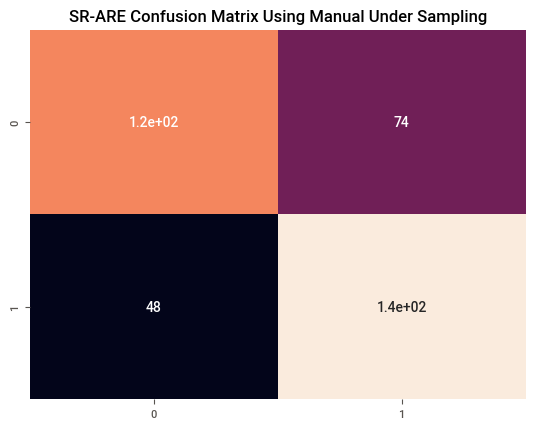

In [58]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True,cbar=False).set_title('SR-ARE Confusion Matrix Using Manual Under Sampling')
plt.savefig('Manual_UnderSamling_SR-ARE.png')

Several directions we could consider (?):
1. try a different type of modeling method and compare with this random forest one
2. repeat this procedure to train on another toxicity type
3. how do we visualize the result?
4. maybe we can leave out/find a structure that we know it is toxic/not toxic and let the model predict to illustrate our result? And we can do a hand comparison of the fingerprint string to show it?
5. include some biochem structure explanation?